# ***Monte Carlo Algorithm for solving 1D integrate***

## *importing the modules and packages, Configuration of the Figs and Data directories*

In [1]:
include("Q1-MC.jl")
using Plots, LaTeXStrings, StatsPlots, StatsBase, Distributions, JLD, ProgressMeter, SpecialFunctions, Latexify, DataFrames, BenchmarkTools
figpath = "../../Figs/Q1/"
datapath = "../../Data/Q1/"
Plots.default(titlefontsize = 12, tickfontsize = 10, labelfontsize = 12,
    fontfamily = "Computer Modern", frame = :box, label = nothing)

## ***1D Integration using the Uniform sampling.***

### *$$f_{(x)} = \int e^{-x^2} \mathop{dx} \Rightarrow I = \int_0^2 e^{-x^2} \mathop{dx} = \frac{\sqrt{\pi}}{2} \mathrm{erf}_{(2)}$$*

### *exact answer of integration:*

In [2]:
Answerₑ = √π / 2 * erf(2)
ex = :(sqrt(π) / 2 * erf(2) = $Answerₑ)
latexify(ex)

L"$\frac{\sqrt{\pi}}{2} \cdot \mathrm{erf}\left( 2 \right) = 0.8820813907624215$"

### *Main calculation of SMC*

In [3]:
SampleList = Integer.([10^n for n = 1:8])
SMCResults = []
SMCParameters = Dict()
Prog = Progress(8)
for sample ∈ SampleList
    SMCParameters = Dict(:f => x -> ℯ^(-x^2), :X₀ => 0, :X₁ => 2, :Ŋ => sample)
    I = MCIntegrate.SMC(; SMCParameters...)
    bench = @benchmark MCIntegrate.SMC(; SMCParameters...)
    push!(SMCResults, (I..., mean(bench).time, bench))
    next!(Prog)
end
save(datapath * "SMCResults_data.jld", "SMCResults", SMCResults)

Progress: 100%|█████████████████████████████████████████| Time: 0:01:28


### *Benchmark display for multiple samples count:*

In [4]:
for i ∈ 1:8
    display(latexify(:(Smples = $(SampleList[i]))))
    display(SMCResults[i][4])
end

L"$Smples = 10$"

BenchmarkTools.Trial: 10000 samples with 8 evaluations.
 Range (min … max):  2.900 μs …  1.106 ms  ┊ GC (min … max): 0.00% … 98.44%
 Time  (median):     4.612 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   5.796 μs ± 14.859 μs  ┊ GC (mean ± σ):  3.41% ±  1.39%

    █▁   ▁                                                    
  ▃███▆▅▆█▆▄▄▃▂▂▂▂▂▂▃▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  2.9 μs         Histogram: frequency by time        17.3 μs <

 Memory estimate: 1.39 KiB, allocs estimate: 23.

L"$Smples = 100$"

BenchmarkTools.Trial: 10000 samples with 8 evaluations.
 Range (min … max):  4.162 μs … 857.538 μs  ┊ GC (min … max): 0.00% … 98.45%
 Time  (median):     6.787 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   8.683 μs ±  17.300 μs  ┊ GC (mean ± σ):  3.45% ±  1.96%

   ▅█▁                                                         
  ▄███▆▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▂▁▂▁▂▁▁▁▁▂▁▁▂▂▂▂▁▁▁▁▂▁▁▁▂▁▂▁▂▂▁▁▂▂▂▂ ▂
  4.16 μs         Histogram: frequency by time        68.7 μs <

 Memory estimate: 2.83 KiB, allocs estimate: 23.

L"$Smples = 1000$"

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  11.500 μs …   9.463 ms  ┊ GC (min … max): 0.00% … 99.65%
 Time  (median):     21.200 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   29.867 μs ± 155.666 μs  ┊ GC (mean ± σ):  8.91% ±  1.72%

  ▄█▆▆▇▆█▆▄▃▁▁▂▂▂▃▃▂▂▂▂▁▁▂▁ ▁                                  ▂
  █████████████████████████████████████▇▇██▇▇█▇▆▆▆▆▅▅▄▅▅▅▅▄▅▄▅ █
  11.5 μs       Histogram: log(frequency) by time       115 μs <

 Memory estimate: 16.97 KiB, allocs estimate: 24.

L"$Smples = 10000$"

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):   77.100 μs …   8.465 ms  ┊ GC (min … max): 0.00% … 98.23%
 Time  (median):     155.800 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   189.855 μs ± 265.392 μs  ┊ GC (mean ± σ):  6.42% ±  4.94%

      ▁ ▃▃ ▃▄█   ▁                                               
  ▅▄▅█████████▇▇▅█▅▆▆▇▆█▅▅▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁ ▃
  77.1 μs          Histogram: frequency by time          456 μs <

 Memory estimate: 157.50 KiB, allocs estimate: 26.

L"$Smples = 100000$"

BenchmarkTools.Trial: 2815 samples with 1 evaluation.
 Range (min … max):  725.800 μs …  10.386 ms  ┊ GC (min … max): 0.00% … 69.92%
 Time  (median):       1.587 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):     1.765 ms ± 837.658 μs  ┊ GC (mean ± σ):  5.49% ± 10.61%

     ▁▄▂▄█▆▄▃▃▂▁▃▁▁                                              
  ▃▅▇███████████████▆▆▅▄▅▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂▂▂▂▂▂▂▂ ▄
  726 μs           Histogram: frequency by time         5.63 ms <

 Memory estimate: 1.53 MiB, allocs estimate: 26.

L"$Smples = 1000000$"

BenchmarkTools.Trial: 271 samples with 1 evaluation.
 Range (min … max):  12.100 ms … 37.622 ms  ┊ GC (min … max): 0.00% … 22.20%
 Time  (median):     17.011 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   18.452 ms ±  4.284 ms  ┊ GC (mean ± σ):  9.92% ± 14.04%

       ▃▁▂▇▁█▇▆▃█▁▄▆▂                ▁                         
  ▄▁▃▄▆██████████████▆▅▆▃▆▇▅▇▆▄▁▄▅▆▅▆█▇▇▃▅▆▅▅▅▄▄▃▃▃▄▅▄▄▁▁▃▁▁▃ ▄
  12.1 ms         Histogram: frequency by time        29.8 ms <

 Memory estimate: 15.26 MiB, allocs estimate: 26.

L"$Smples = 10000000$"

BenchmarkTools.Trial: 25 samples with 1 evaluation.
 Range (min … max):  161.008 ms … 374.070 ms  ┊ GC (min … max):  9.59% … 54.85%
 Time  (median):     184.549 ms               ┊ GC (median):     9.60%
 Time  (mean ± σ):   202.238 ms ±  52.947 ms  ┊ GC (mean ± σ):  16.52% ± 12.66%

     █▃██▃▃                                                      
  ▇▁▇██████▇▁▇▇▇▇▁▁▁▁▁▁▁▁▇▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▇▁▇ ▁
  161 ms           Histogram: frequency by time          374 ms <

 Memory estimate: 152.59 MiB, allocs estimate: 26.

L"$Smples = 100000000$"

BenchmarkTools.Trial: 3 samples with 1 evaluation.
 Range (min … max):  1.690 s …    2.172 s  ┊ GC (min … max):  0.10% … 18.58%
 Time  (median):     2.077 s               ┊ GC (median):    15.85%
 Time  (mean ± σ):   1.980 s ± 255.482 ms  ┊ GC (mean ± σ):  12.37% ±  9.98%

  █                                             █          █  
  █▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁█ ▁
  1.69 s         Histogram: frequency by time         2.17 s <

 Memory estimate: 1.49 GiB, allocs estimate: 26.

### *Distribution of answers:*

In [5]:
IDataSMC = []
σDataSMC = []
SampleList = Integer.([10^n for n = 1:8])
runnum = 1000
Prog = Progress(runnum * 8)
for i ∈ 1:8
    SMCParameters = Dict(:f => x -> ℯ^(-x^2), :X₀ => 0, :X₁ => 2, :Ŋ => SampleList[i])
    Iansemble = Float64[]
    σansemble = Float64[]
    for n ∈ 1:runnum
        MCI = MCIntegrate.SMC(; SMCParameters...)
        push!(Iansemble, MCI[1])
        push!(σansemble, MCI[2])
        next!(Prog)
        update!(Prog)
    end
    push!(IDataSMC, Iansemble)
    push!(σDataSMC, σansemble)
end
save(datapath * "IntDistSMC_data.jld", "IDataSMC", IDataSMC, "σDataSMC", σDataSMC)+

Progress: 100%|█████████████████████████████████████████| Time: 0:34:34
Progress: 100%|█████████████████████████████████████████| Time: 0:34:34


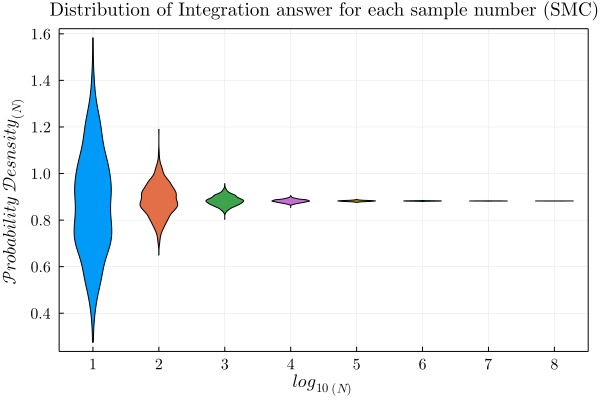

In [6]:
SMCVilPlot = begin
    violin(hcat(string.(1:8)...), IDataSMC)
    plot!(xlabel = L"{\mathcal{log}_{10}}_{(N)}", ylabel = L"\mathcal{Probability\ Desnsity}_{(N)}", title = "Distribution of Integration answer for each sample number (SMC)")
end
savefig(SMCVilPlot, figpath * "SMCVilPlot.pdf")
display(SMCVilPlot)

## ***1D Integration using the Uniform sampling.***

### *$$f_{(x)} = \int e^{-x^2} \mathop{dx} \Rightarrow I = \int_0^2 e^{-x^2} \mathop{dx} = \frac{\sqrt{\pi}}{2} \mathrm{erf}_{(2)}$$*
### *$$ \mathcal{g}_{(x)} = e^{-x}\ \&\ x \in [0,2]\ which\ is\ equal\ to\ \frac{e^{-x}}{1-e^{-2}}\ \Rightarrow y = \mathcal{D_f}_{(x)} = -\mathrm{ln}\left(1-\left[1-e^{-2}\right]x\right) $$*

### *Main calculation of IMC*

In [7]:
SampleList = Integer.([10^n for n = 1:8])
IMCResults = []
Prog = Progress(8)
IMCParameters = Dict()
for sample ∈ SampleList
    IMCParameters = Dict(:f => x -> ℯ^(-x^2), :g => x -> ℯ^-x, :∫gₓdx => 1 - ℯ^-2, :Đₓ => x -> -log(1 - (1 - ℯ^-2) * x), :Ŋ => sample)
    I = MCIntegrate.IMC(; IMCParameters...)
    bench = @benchmark MCIntegrate.IMC(; IMCParameters...)
    push!(IMCResults, (I..., mean(bench).time, bench))
    next!(Prog)
end
save(datapath * "IMCResults_data.jld", "IMCResults", IMCResults)

Progress: 100%|█████████████████████████████████████████| Time: 0:01:22


### *Benchmark display for multiple samples count:*

In [8]:
for i ∈ 1:8
    display(latexify(:(Smples = $(SampleList[i]))))
    display(IMCResults[i][4])
end

L"$Smples = 10$"

BenchmarkTools.Trial: 10000 samples with 9 evaluations.
 Range (min … max):  2.922 μs … 775.122 μs  ┊ GC (min … max): 0.00% … 99.01%
 Time  (median):     3.089 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   3.529 μs ±  10.341 μs  ┊ GC (mean ± σ):  4.09% ±  1.40%

  █▇▆▆▅▄▃▂▁▁                                                  ▂
  ██████████▇█▇▅▄▄▄▇█▇█▇▇▆█▇▆▇▇▅▆▅▄▆▆▆▆▆▅▅▅▆▆▆▆▆▅▄▅▅▅▅▅▅▄▅▄▄▄ █
  2.92 μs      Histogram: log(frequency) by time      8.46 μs <

 Memory estimate: 1.61 KiB, allocs estimate: 31.

L"$Smples = 100$"

BenchmarkTools.Trial: 10000 samples with 7 evaluations.
 Range (min … max):  4.857 μs … 612.971 μs  ┊ GC (min … max): 0.00% … 98.62%
 Time  (median):     5.114 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   5.763 μs ±  10.573 μs  ┊ GC (mean ± σ):  3.12% ±  1.71%

   █                                                           
  ▆█▆▂▂▂▂▃▃▄▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▁
  4.86 μs         Histogram: frequency by time        11.6 μs <

 Memory estimate: 3.05 KiB, allocs estimate: 31.

L"$Smples = 1000$"

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  22.300 μs …  8.180 ms  ┊ GC (min … max): 0.00% … 99.44%
 Time  (median):     24.900 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   28.334 μs ± 87.398 μs  ┊ GC (mean ± σ):  3.92% ±  1.40%

  ▅▆▇█▄▇▄▃▃▂                                                  ▂
  ████████████▇▅▅▄▃▆▇▆▇▇▇▇▅▄▆▆▆▅▆▅▄▃▄▃▅▆▆▇▆██▇▇▇▇▅▆▅▄▂▄▄▄▂▄▄▄ █
  22.3 μs      Histogram: log(frequency) by time      67.9 μs <

 Memory estimate: 17.19 KiB, allocs estimate: 32.

L"$Smples = 10000$"

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  199.200 μs …   6.260 ms  ┊ GC (min … max): 0.00% … 95.99%
 Time  (median):     231.600 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   243.873 μs ± 181.073 μs  ┊ GC (mean ± σ):  3.32% ±  4.53%

  ▃██▄▁▃▆▇▇▅▄▄▃▃▂▂▂▁                                            ▂
  ████████████████████████▇██▇▇▇▇▇▇▇▇▆▆▆▆▅▆▅▅▅▅▆▄▅▃▅▅▄▅▅▅▄▄▄▄▃▄ █
  199 μs        Histogram: log(frequency) by time        481 μs <

 Memory estimate: 157.72 KiB, allocs estimate: 34.

L"$Smples = 100000$"

BenchmarkTools.Trial: 2085 samples with 1 evaluation.
 Range (min … max):  1.949 ms …   6.697 ms  ┊ GC (min … max): 0.00% … 64.73%
 Time  (median):     2.311 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   2.389 ms ± 524.251 μs  ┊ GC (mean ± σ):  2.47% ±  7.69%

  ▁▇█▅▅▄▆▇▇▅▅▄▄▃▂▂                                            ▁
  ███████████████████▇▅█▆▆█▇▇▆▅▆█▇▅▅▆▅▄▄▅▅▄▁▅▁▅▄▄▄▁▁▄▄▅▄▆▆▅▇▆ █
  1.95 ms      Histogram: log(frequency) by time      4.84 ms <

 Memory estimate: 1.53 MiB, allocs estimate: 34.

L"$Smples = 1000000$"

BenchmarkTools.Trial: 195 samples with 1 evaluation.
 Range (min … max):  22.180 ms … 38.744 ms  ┊ GC (min … max): 0.00% … 21.33%
 Time  (median):     24.596 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   25.693 ms ±  2.921 ms  ┊ GC (mean ± σ):  4.51% ±  7.54%

    ▂▆█▆▆▇▇▄▁▃ ▇▁           ▁                                  
  ▄▁██████████▇██▇▇▄▆▃▃▆▃▆▃▆█▆▇▁▄▃▇▁▃▇▄▃▇▆▆▁▁▄▄▁▄▃▃▃▁▁▁▁▁▁▃▁▄ ▃
  22.2 ms         Histogram: frequency by time        33.9 ms <

 Memory estimate: 15.26 MiB, allocs estimate: 34.

L"$Smples = 10000000$"

BenchmarkTools.Trial: 18 samples with 1 evaluation.
 Range (min … max):  255.423 ms … 407.206 ms  ┊ GC (min … max): 4.14% … 39.19%
 Time  (median):     261.430 ms               ┊ GC (median):    4.15%
 Time  (mean ± σ):   279.380 ms ±  45.470 ms  ┊ GC (mean ± σ):  9.86% ± 10.60%

   █                                                             
  ▇█▇▇▇▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄▁▁▁▁▄ ▁
  255 ms           Histogram: frequency by time          407 ms <

 Memory estimate: 152.59 MiB, allocs estimate: 34.

L"$Smples = 100000000$"

BenchmarkTools.Trial: 2 samples with 1 evaluation.
 Range (min … max):  2.548 s …    2.804 s  ┊ GC (min … max): 0.06% … 9.86%
 Time  (median):     2.676 s               ┊ GC (median):    5.20%
 Time  (mean ± σ):   2.676 s ± 181.105 ms  ┊ GC (mean ± σ):  5.20% ± 6.93%

  █                                                        █  
  █▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  2.55 s         Histogram: frequency by time          2.8 s <

 Memory estimate: 1.49 GiB, allocs estimate: 34.

### *Distribution of answers:*

In [9]:
IDataIMC = []
σDataIMC = []
runnum = 1000
Prog = Progress(runnum * 8)
for i ∈ 1:8
    IMCParameters = Dict(:f => x -> ℯ^(-x^2), :g => x -> ℯ^-x, :∫gₓdx => 1 - ℯ^-2, :Đₓ => x -> -log(1 - (1 - ℯ^-2) * x), :Ŋ => SampleList[i])
    Iansemble = Float64[]
    σansemble = Float64[]
    for n ∈ 1:runnum
        MCI = MCIntegrate.IMC(; IMCParameters...)
        push!(Iansemble, MCI[1])
        push!(σansemble, MCI[2])
        next!(Prog)
        update!(Prog)
    end
    push!(IDataIMC, Iansemble)
    push!(σDataIMC, σansemble)
end
save(datapath * "IntDistIMC_data.jld", "IDataIMC", IDataIMC, "σDataIMC", σDataIMC)

Progress: 100%|█████████████████████████████████████████| Time: 0:48:45
Progress: 100%|█████████████████████████████████████████| Time: 0:48:45


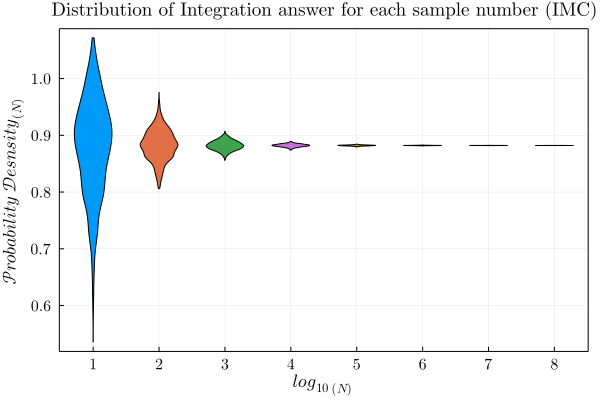

In [10]:
IMCVilPlot = begin
    violin(hcat(string.(1:8)...), IDataIMC)
    plot!(xlabel = L"{\mathcal{log}_{10}}_{(N)}", ylabel = L"\mathcal{Probability\ Desnsity}_{(N)}", title = "Distribution of Integration answer for each sample number (IMC)")
end
savefig(IMCVilPlot, figpath * "IMCVilPlot.pdf")
display(IMCVilPlot)

## ***Plotting and saving the results:***

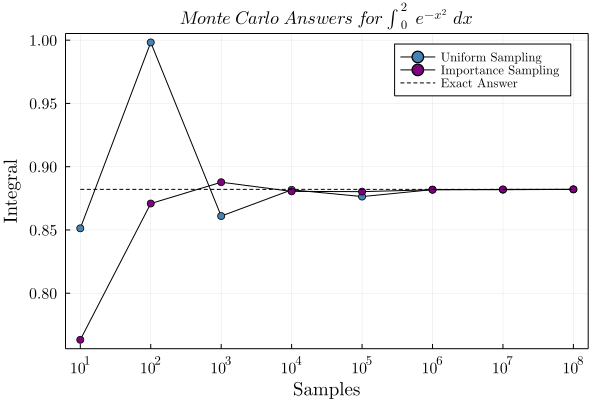

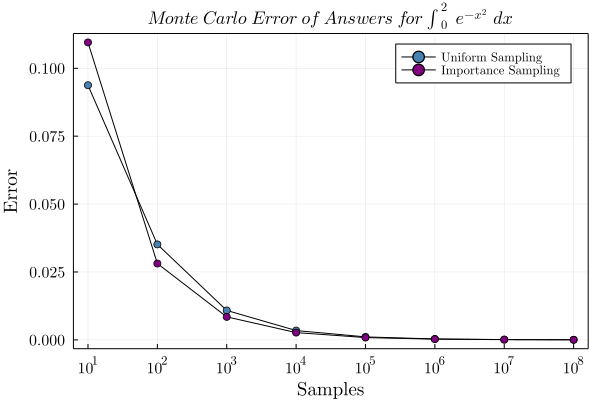

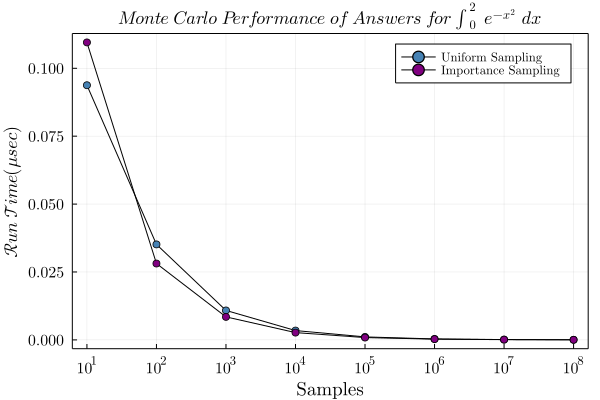

In [33]:
AnswerList = repeat([Answerₑ], 8)

MCAnswerPlot = plot(SampleList, [getindex.(SMCResults, 1) getindex.(IMCResults, 1) AnswerList], linecolor = :black, markercolor = [:steelblue :purple nothing],
    markers = [:circle :circle :none], linestyles = [:solid :solid :dash],
    xlabel = "Samples", ylabel = "Integral", title = L"Monte\ Carlo\ Answers\ for\ \int{}_{0}^{2}\ e^{-x^2}\ dx",
    labels = ["Uniform Sampling" "Importance Sampling" "Exact Answer"], xaxis = :log, xticks = SampleList)
MCErrorPlot = plot(SampleList, [getindex.(SMCResults, 2) getindex.(IMCResults, 2)], linecolor = :black, markercolor = [:steelblue :purple],
    markers = [:circle :circle], linestyles = [:solid :solid],
    xlabel = "Samples", ylabel = "Error", title = L"Monte\ Carlo\ Error\ of\ Answers\ for\ \int{}_{0}^{2}\ e^{-x^2}\ dx",
    labels = ["Uniform Sampling" "Importance Sampling"], xaxis = :log, xticks = SampleList)
MCPerformPlot = plot(SampleList, [getindex.(SMCResults, 2) getindex.(IMCResults, 2)], linecolor = :black, markercolor = [:steelblue :purple],
    markers = [:circle :circle], linestyles = [:solid :solid],
    xlabel = "Samples", ylabel = L"\mathcal{Run\ Time}(\mu sec)", title = L"Monte\ Carlo\ Performance\ of\ Answers\ for\ \int{}_{0}^{2}\ e^{-x^2}\ dx",
    labels = ["Uniform Sampling" "Importance Sampling"], xaxis = :log, xticks = SampleList)
savefig(MCAnswerPlot, figpath * "MCAnswerPlot.pdf")
savefig(MCErrorPlot, figpath * "MCErrorPlot.pdf")
savefig(MCPerformPlot, figpath * "MCPerformPlot.pdf")
display(MCAnswerPlot)
display(MCErrorPlot)
display(MCPerformPlot)